# Intermediate Xarray DataStructures
<img src="https://docs.xarray.dev/en/stable/_static/Xarray_Logo_RGB_Final.svg" align="right" width="30%">


In this lesson, we cover the basics of Xarray data structures. By the
end of the lesson, we will be able to:

- Understand the basic data structures in Xarray
- Inspect `DataArray` and `Dataset` objects.
- Select Data using Dataset Coordinates
- Understand that these Datastructures generalize across fields


We'll start by reviewing the various components of the Xarray data model, represented here visually:

<img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png" align="center" width="50%">



## Variable

At the the core of everything Xarray works with Variables:

Variables hold arbitrary metadata, dimension names, and an Array of data
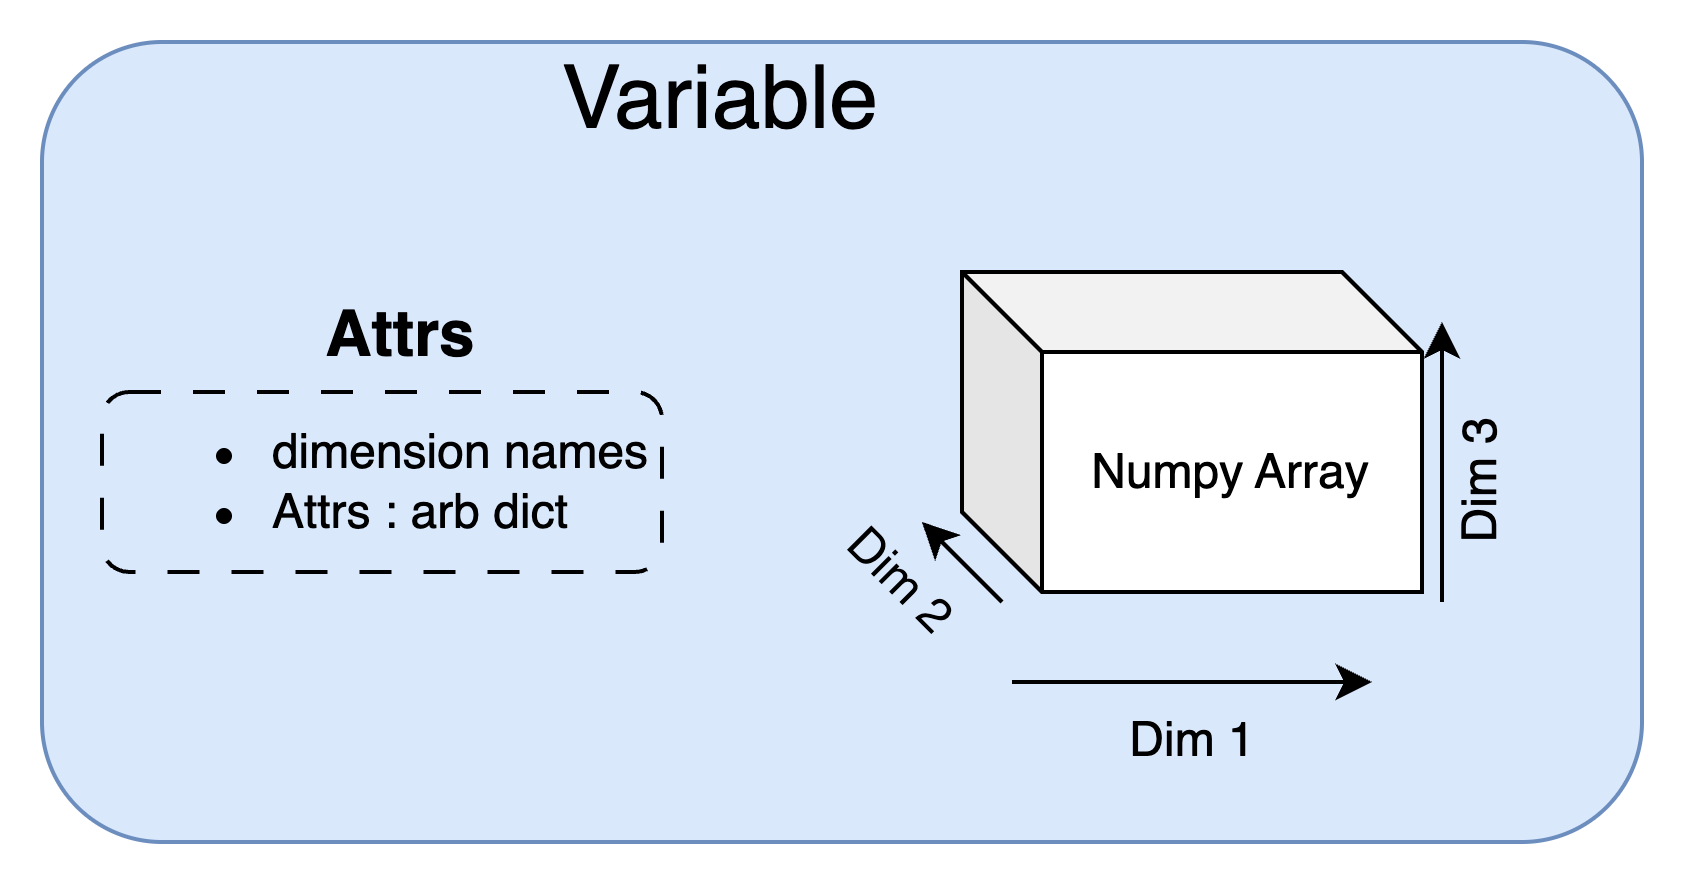


## DataArray

A DataArray is lowest level object you will regularly interact with. It is a collection of 1 variable containing the data, and optionally Variables associated with the dimensions (coords)

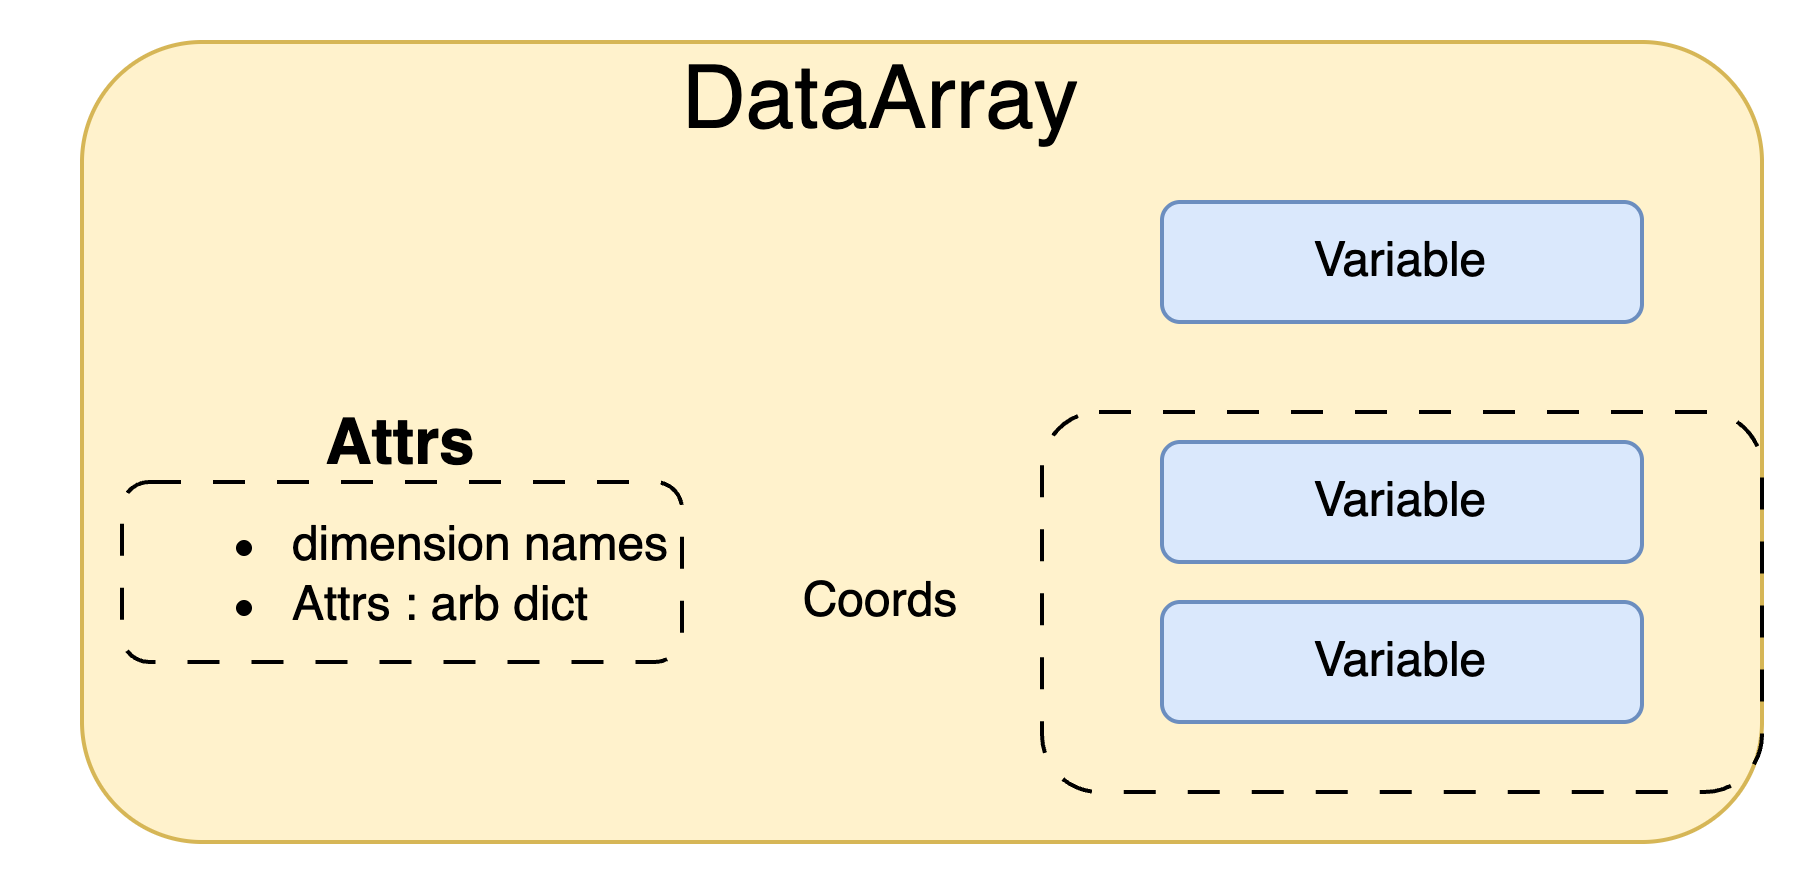


## Dataset

A Dataset is also a collection of Variables. However it can contain multiple data variables. All dimensions MUST be compatible. When we access one of the data variables a DataArray will automatically created for us.

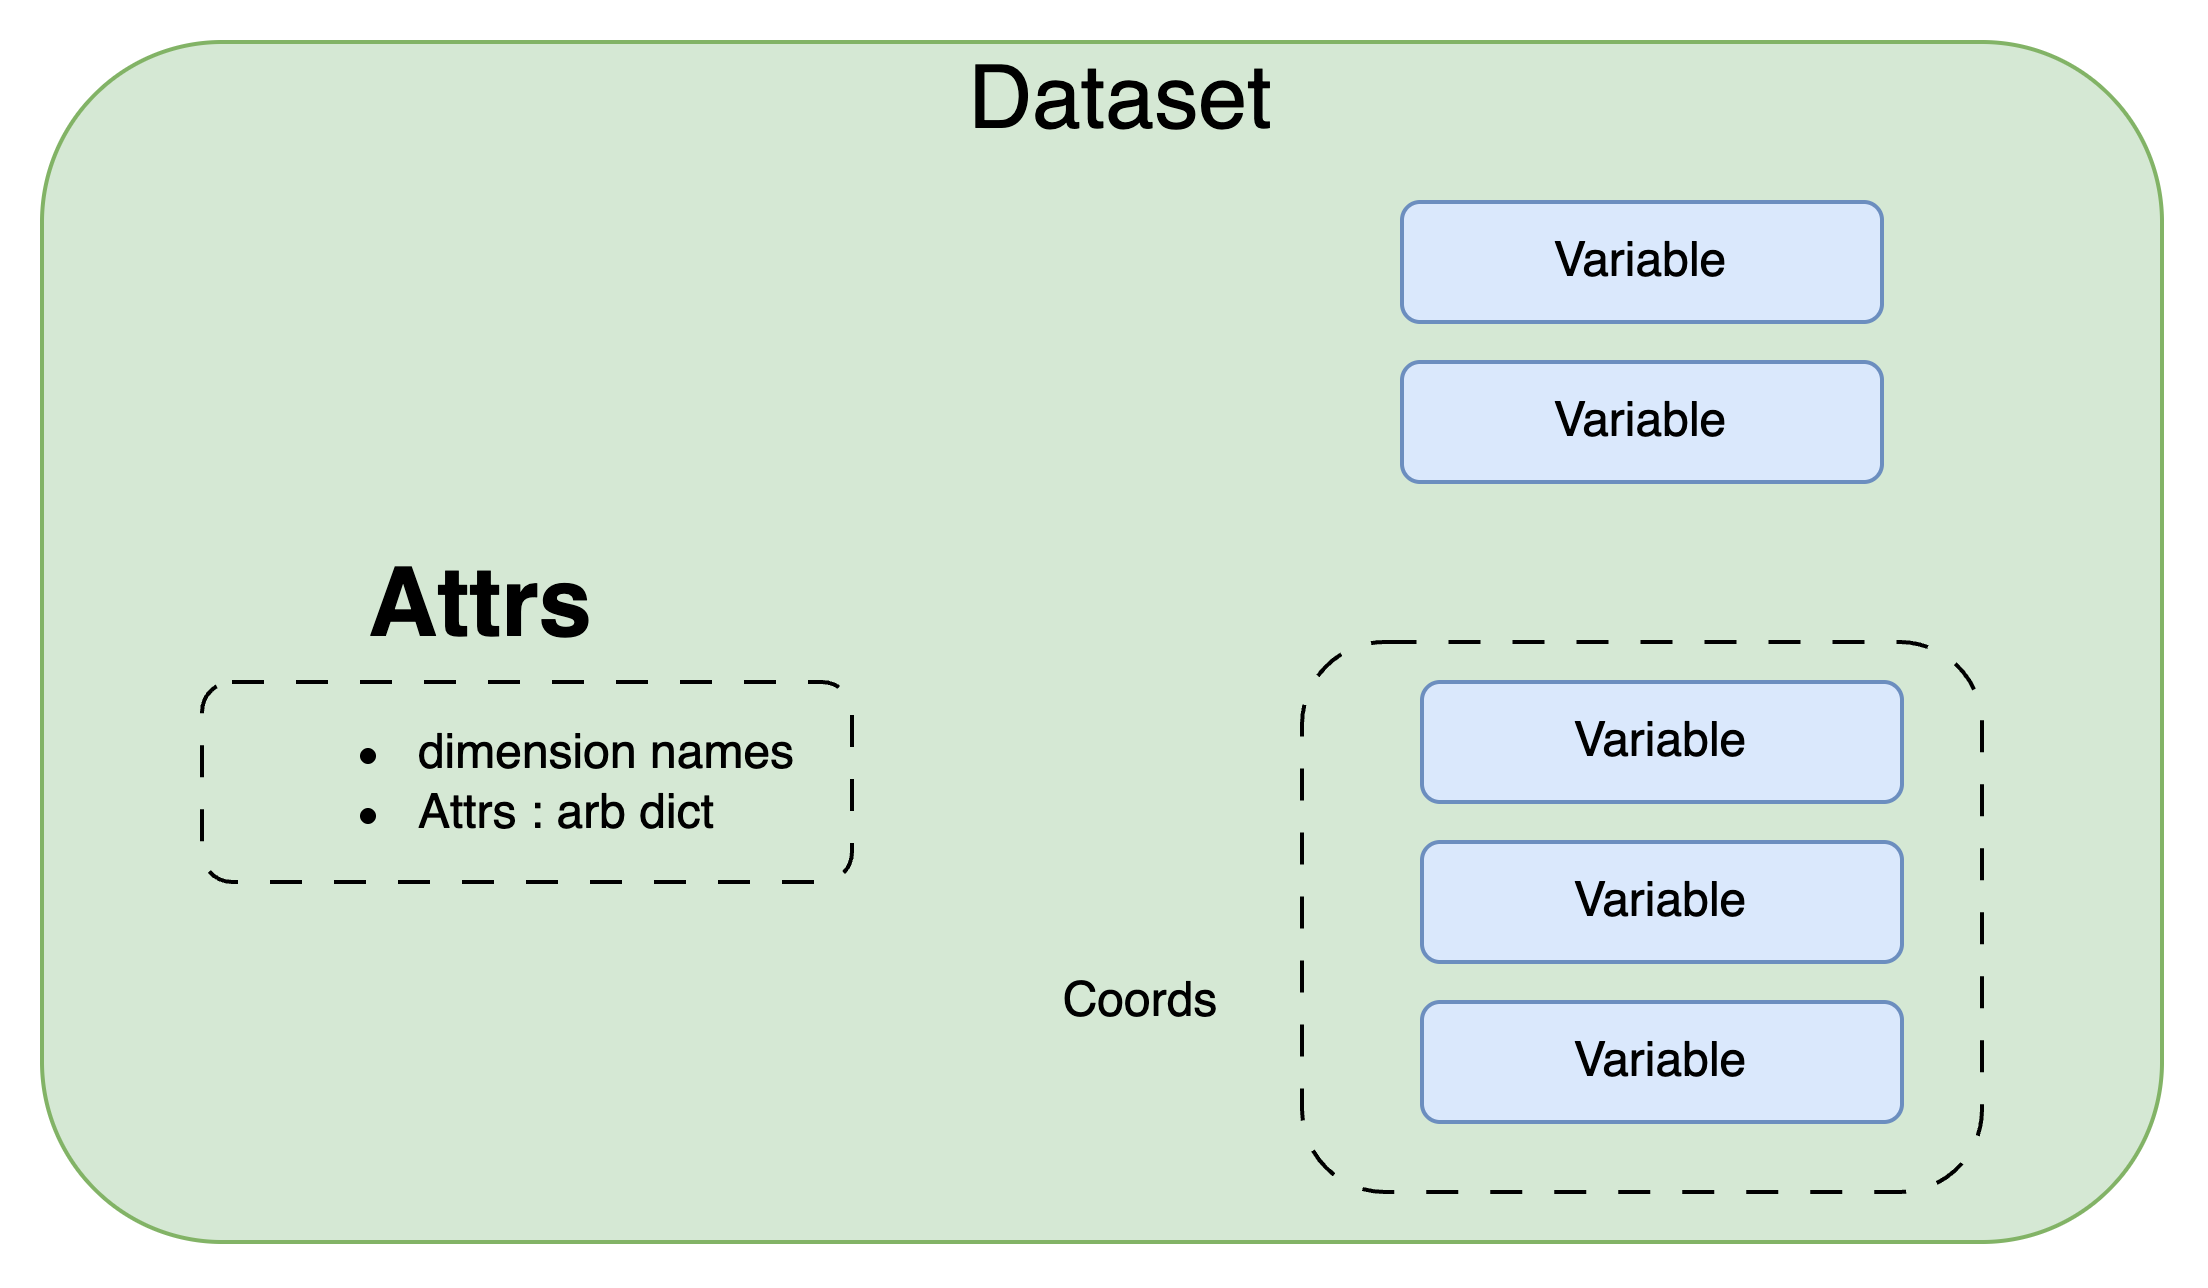

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr



Xarray has a few small real-world tutorial datasets hosted in the [xarray-data](https://github.com/pydata/xarray-data) GitHub repository.

[xarray.tutorial.load_dataset](https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html#xarray.tutorial.open_dataset) is a convenience function to download and open DataSets by name (listed at that link).

Here we'll use `air temperature` from the [National Center for Environmental Prediction](https://www.weather.gov/ncep/). Xarray objects have convenient HTML representations to give an overview of what we're working with:

In [ ]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

Note that behind the scenes the `tutorial.open_dataset` downloads a file. It then uses [`xarray.open_dataset`](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html#xarray-open-dataset) function to open that file (which for this datasets is a [netCDF](https://www.unidata.ucar.edu/software/netcdf/) file). 


As a preview of the power of Xarray, using this data structure allows us to make very readable and powerful statements such as:

In [ ]:
ds.air.mean(dim="time").plot(x="lon")

## What's in a Dataset? 

*Many DataArrays!* 

Datasets are dictionary-like containers of "DataArray"s. They are a mapping of
variable name to DataArray:

In [ ]:
# pull out "air" dataarray with dictionary syntax
ds["air"]

You can save some typing by using the "attribute" or "dot" notation. This won't
work for variable names that clash with a built-in method name (like `mean` for
example).


In [ ]:
# pull out dataarray using dot notation
ds.air

## What's in a DataArray? 

*data + (a lot of) metadata*

### Name (optional)

In [ ]:
da = ds.air

da.name

### Named dimensions 

`.dims` correspond to the axes of your data. 

In this case we have 2 spatial dimensions (`latitude` and `longitude` are stored with shorthand names `lat` and `lon`) and one temporal dimension (`time`).

In [ ]:
da.dims

### Coordinate variables 

`.coords` is a simple [data container](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#coordinates)
for coordinate variables.

Here we see the actual timestamps and spatial positions of our air temperature data:

In [ ]:
da.coords

Coordinates objects support similar indexing notation


In [ ]:
# extracting coordinate variables
da.lon

In [ ]:
# extracting coordinate variables from .coords
da.coords["lon"]

It is useful to think of the values in these coordinate variables as axis
"labels" such as "tick labels" in a figure. These are coordinate locations on a
grid at which you have data.


### Arbitrary attributes 

`.attrs` is a dictionary that can contain arbitrary Python objects (strings, lists, integers, dictionaries, etc.) Your only
limitation is that some attributes may not be writeable to certain file formats.

In [ ]:
da.attrs

In [ ]:
# assign your own attributes!
da.attrs["who_is_awesome"] = "xarray"
da.attrs

In [ ]:
da

### Underlying data 

`.data` contains the [numpy array](https://numpy.org) storing air temperature values.

<img src="https://raw.githubusercontent.com/numpy/numpy/623bc1fae1d47df24e7f1e29321d0c0ba2771ce0/branding/logo/primary/numpylogo.svg" width="25%">

Xarray structures wrap underlying simpler array-like data structures. This part of Xarray is quite extensible allowing for distributed array, GPU arrays, sparse arrays, arrays with units etc. We'll  briefly look at this later in this tutorial.

In [ ]:
da.data

In [ ]:
# what is the type of the underlying data
type(da.data)

### Review

Two of Xarray's main data structures are:

1. [`DataArrays`](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray) that wrap underlying data containers (e.g. numpy arrays) and contain associated metadata
1. [`Datasets`](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset) that are dictionary-like containers of DataArrays

DataArrays contain underlying arrays and associated metadata:
1. Name
2. Dimension names
3. Coordinate variables
4. and arbitrary attributes.


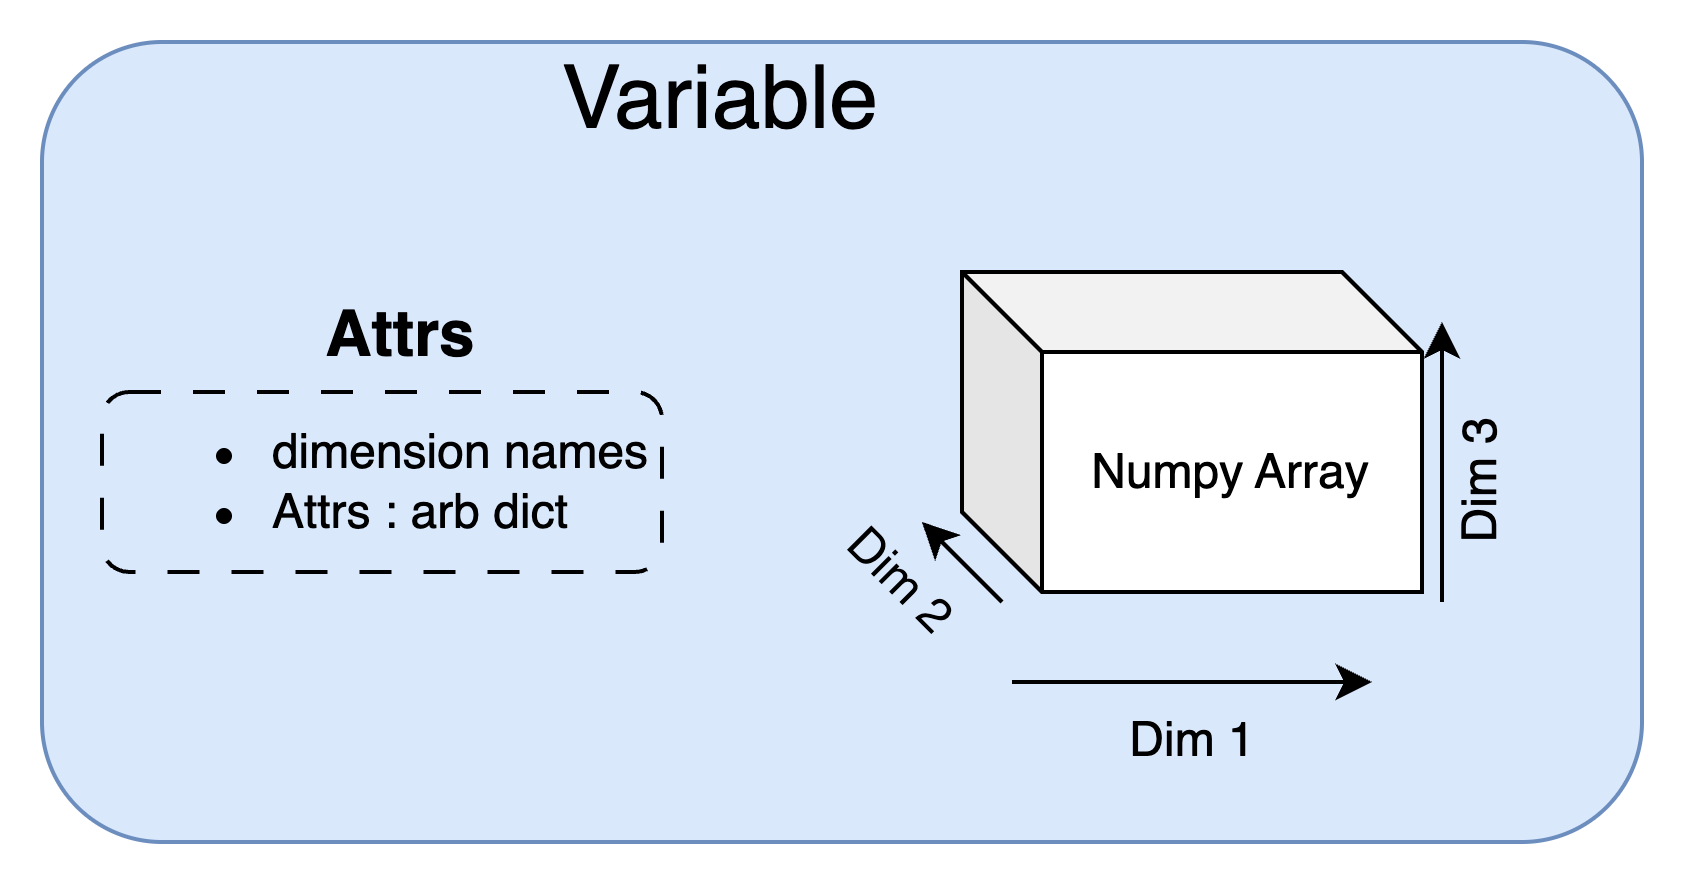


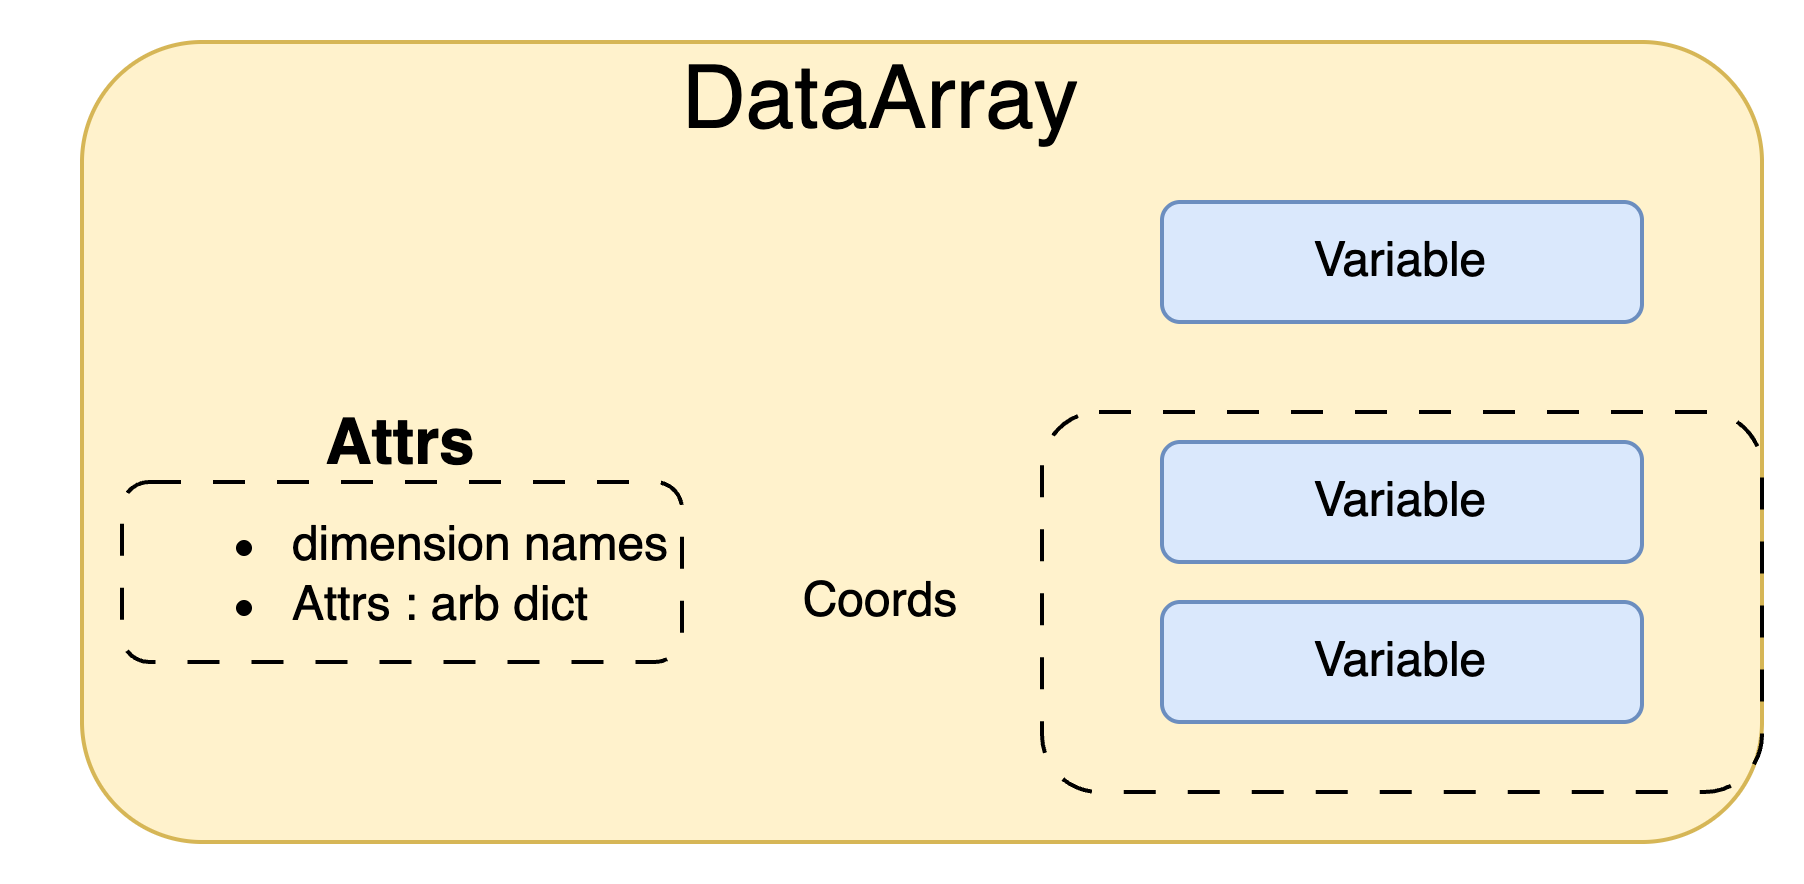

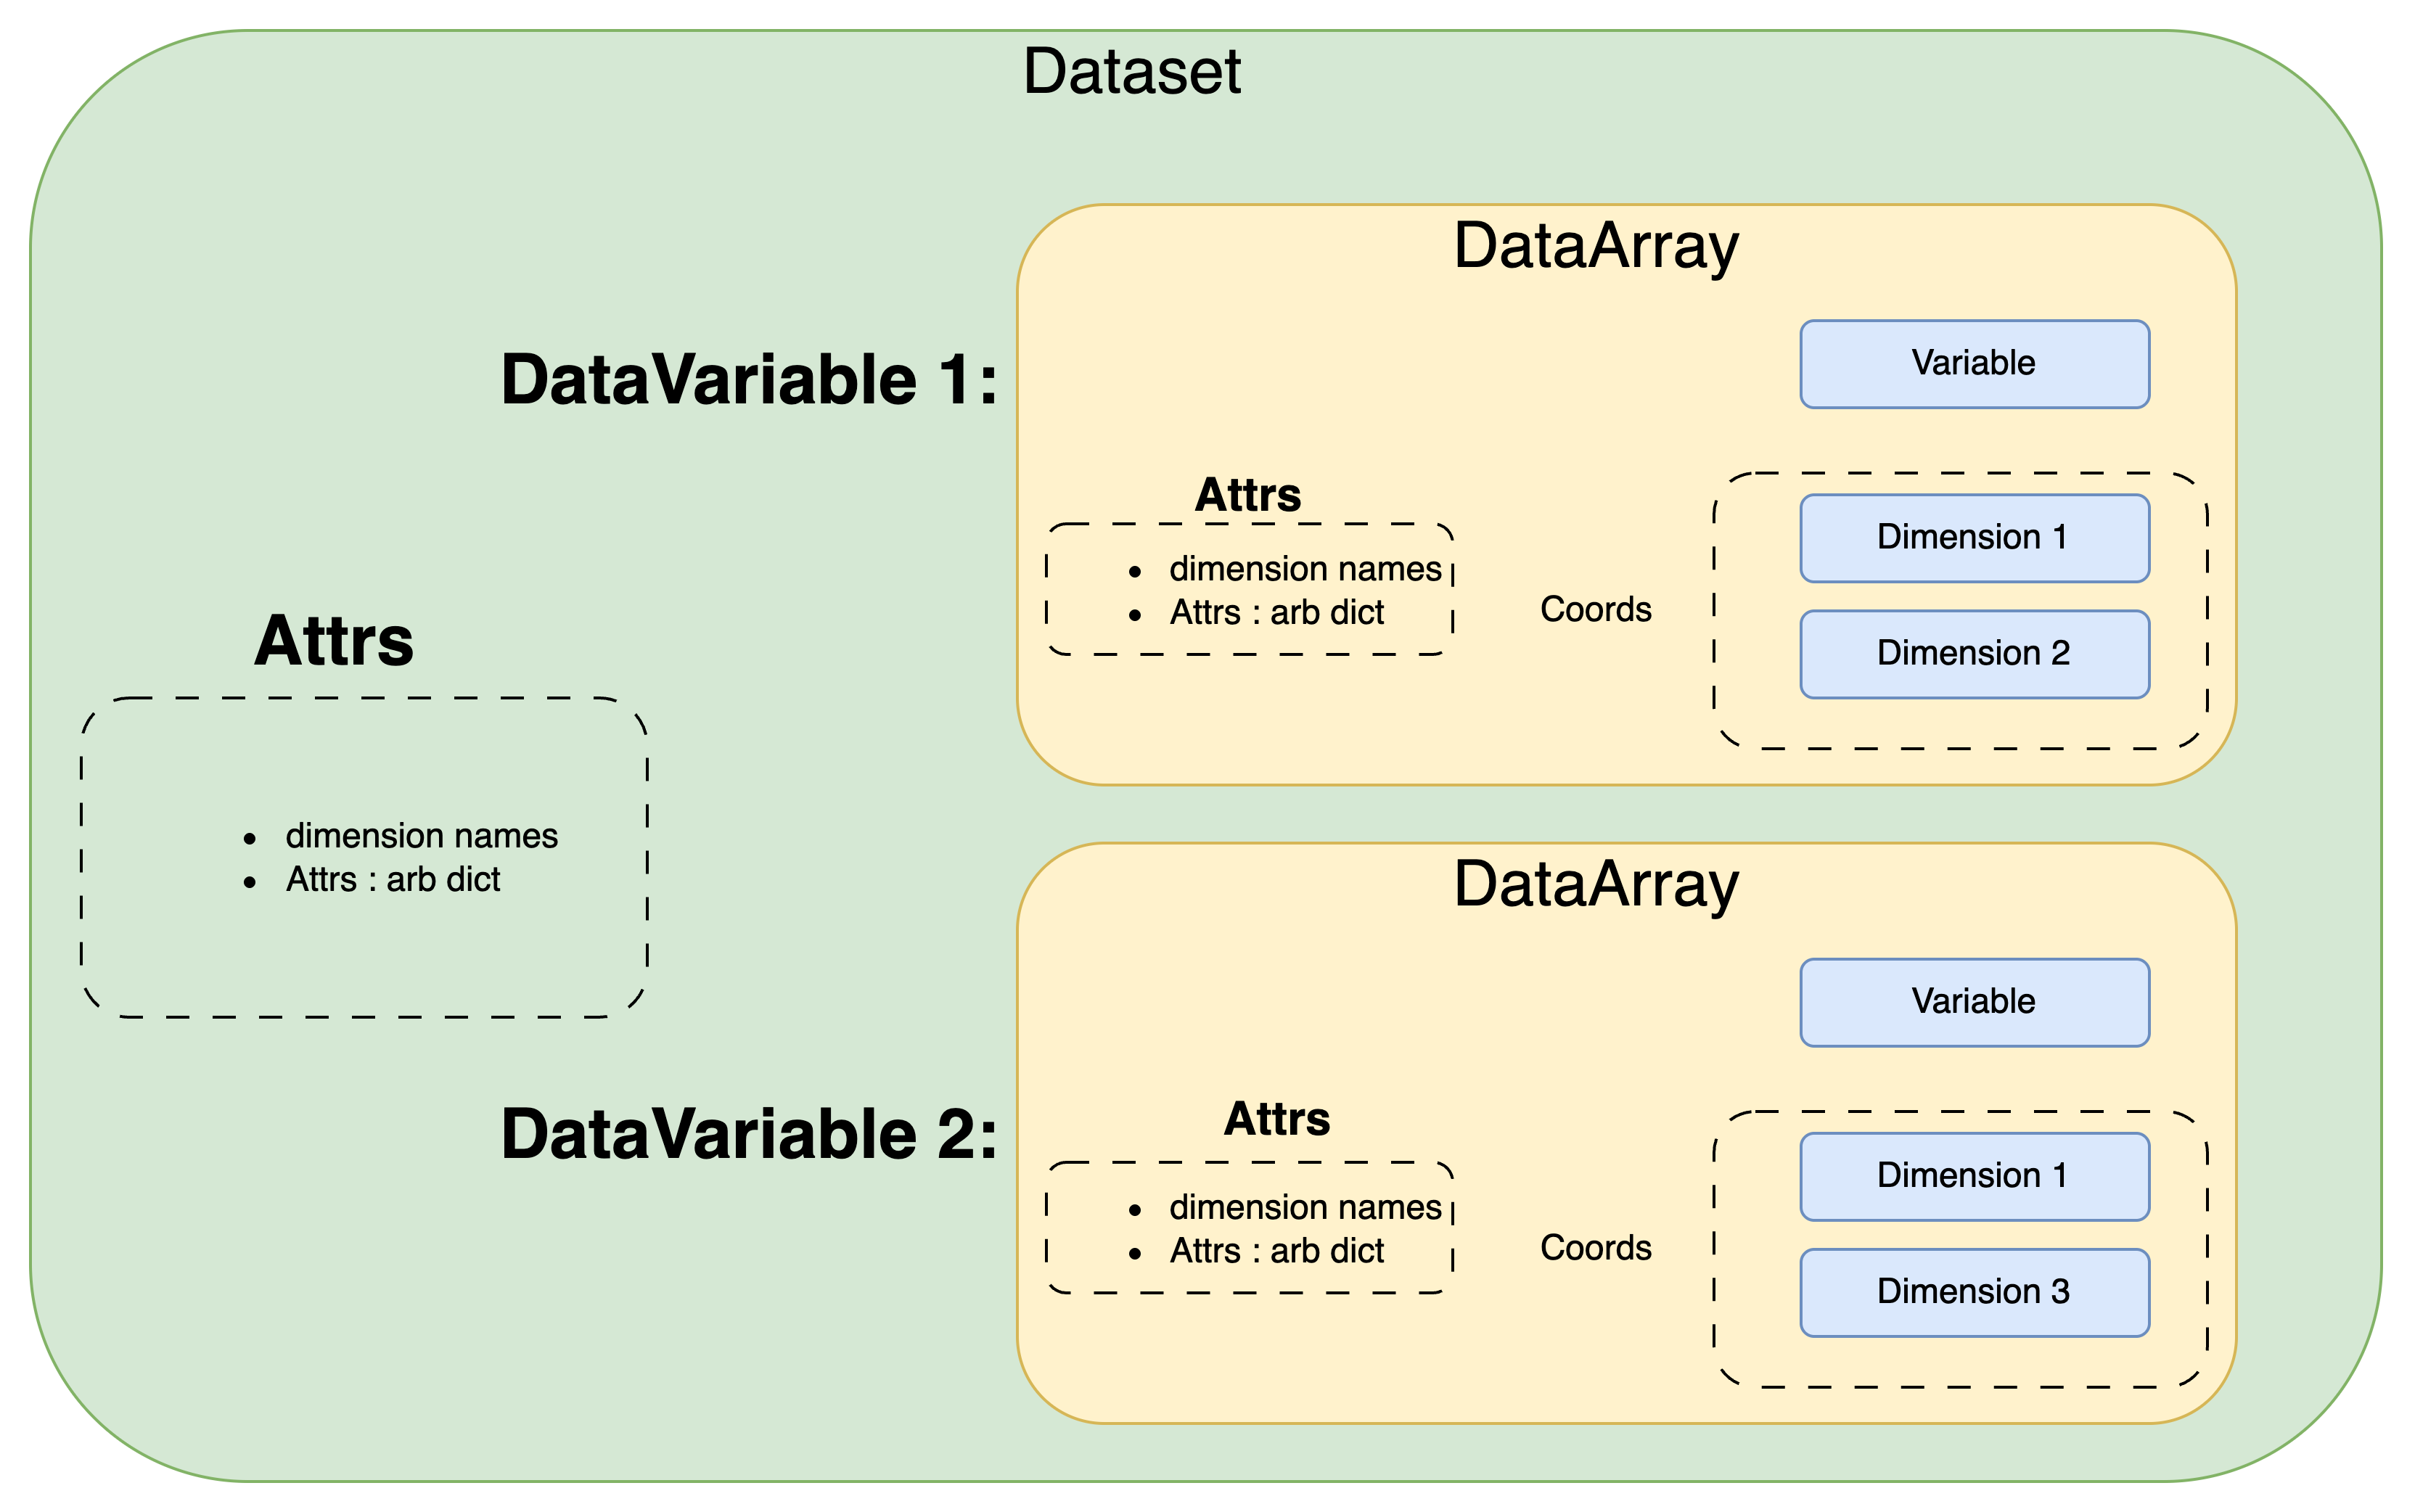

<img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png" align="center" width="50%">

## Exercise

In this exercise the air dataset has been deconstructed into a dictionary of NumPy arrays. Please

- Build a Dataset from scratch from this dictionary of NumPy arrays.


Hint: You will want to start by building DataArrays, then combining them into a Dataset.


In [ ]:
def air_as_dictionary():
    ds = xr.tutorial.open_dataset("air_temperature")
    return {'lat': ds['lat'].values,
     'lon': ds['lon'].values,
     'attrs': ds.attrs,
     'time':ds['time'].values,
     'air-temp':ds['air'].values
    }
data = air_as_dictionary()


# Your code here

## Why Xarray? 

Metadata provides context and provides code that is more legible. This reduces the likelihood of errors from typos and makes analysis more intuitive and fun!

### Analysis without xarray: `X(`

In [ ]:
# plot the first timestep
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array

In [ ]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

In [ ]:
temp.mean(axis=1)  ## what did I just do? I can't tell by looking at this line.

### Analysis with xarray `=)`

How readable is this code?


In [ ]:
ds.air.isel(time=0).plot(x="lon");

Use dimension names instead of axis numbers


In [ ]:
ds.air.mean(dim="time").plot(x="lon")

---

## Extracting data or "indexing" 

Xarray supports

- label-based indexing using `.sel`
- position-based indexing using `.isel`

See the [user guide](https://docs.xarray.dev/en/stable/indexing.html) for more.

### Label-based indexing

Xarray inherits its label-based indexing rules from pandas; this means great
support for dates and times!


In [ ]:
# here's what ds looks like
ds

In [ ]:
# pull out data for all of 2013-May
ds.sel(time="2013-05")

In [ ]:
# demonstrate slicing
ds.sel(time=slice("2013-05", "2013-07"))

In [ ]:
ds.sel(time="2013")

In [ ]:
# demonstrate "nearest" indexing
ds.sel(lon=240.2, method="nearest")

In [ ]:
# "nearest indexing at multiple points"
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

### Position-based indexing

This is similar to your usual numpy `array[0, 2, 3]` but with the power of named
dimensions!


In [ ]:
ds.air.data[0, 2, 3]

In [ ]:
# pull out time index 0, lat index 2, and lon index 3
ds.air.isel(time=0, lat=2, lon=3)  #  much better than ds.air[0, 2, 3]

In [ ]:
# demonstrate slicing
ds.air.isel(lat=slice(10))

## Other field DataStructures


Link to next notebook: [Data structures In Biology](../../intermediate/BiologyDataset.ipynb)

## Exercise

Dataset of non-alignable data.

For this exercise we will be using the `"precipitation"` example data. This data has two parts observed rainfall (`observed`), and predicted rainfall, on a different lat-lon grid. The next cell calls a function that will give you two different Datasets. Try to combine them using the tools we've discussed thus far and observe what goes wrong.


In [ ]:
tree = xr.tutorial.open_datatree('precipitation.nc4')
reanalysis = xr.Dataset(tree['observed'])
observed = xr.Dataset(tree['reanalysis'])

For more see the [user guide](https://docs.xarray.dev/en/stable/plotting.html), the [gallery](https://docs.xarray.dev/en/stable/examples/visualization_gallery.html), and [the tutorial material](https://tutorial.xarray.dev/fundamentals/04.0_plotting.html).